In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
crop.rename(columns={'label':'crop'},inplace=True)
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')

In [7]:
crop.shape

(2200, 8)

In [8]:
crop['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

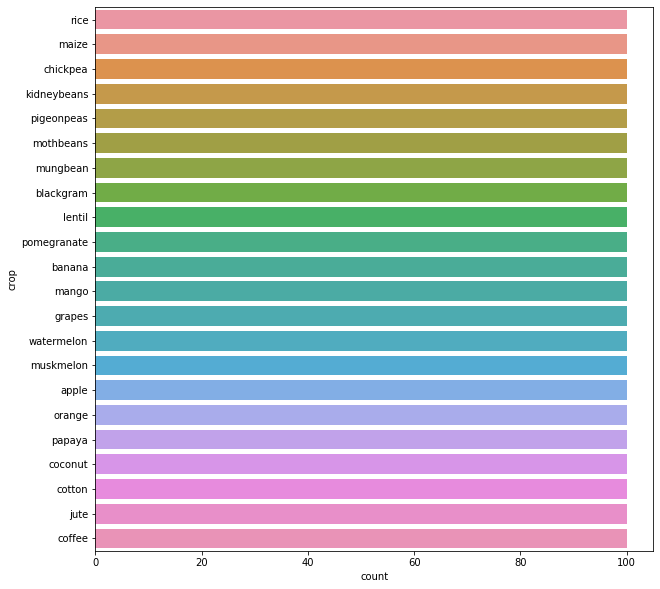

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(y = crop['crop'])

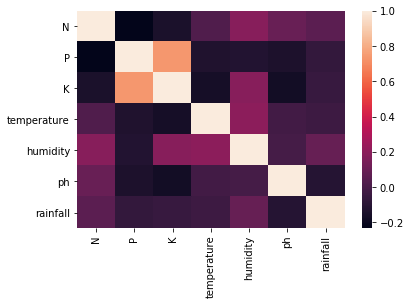

In [11]:
sns.heatmap(crop.corr())

In [12]:
X = crop.drop(['crop'], axis=1)
y = crop['crop']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)
dtree_score =  accuracy_score(y_test, dtree_pred)
print("Decision Tree Classifier Accuracy: ",dtree_score*100)

Decision Tree Classifier Accuracy:  99.0909090909091


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy: ",rf_score*100)

Random Forest Classifier Accuracy:  99.77272727272727


In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

logreg_pred = logreg.predict(X_test)
log_score = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy: ",log_score*100)

Logistic Regression Accuracy:  96.5909090909091


In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

xgb_pred = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy: ", xgb_score*100)

[22:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy:  98.63636363636363


In [18]:
models = ["Decision Tree", "Random Forest", "Logistic Regression","XGBoost"]
scores = [dtree_score, rf_score, log_score, xgb_score]

eval = pd.DataFrame({"Model":models, "Accuracy":scores}).sort_values(by='Accuracy')
eval

,Model,Accuracy
2,Logistic Regression,0.965909
3,XGBoost,0.986364
0,Decision Tree,0.990909
1,Random Forest,0.997727


In [33]:
RF_file = 'RandomForest.pkl'
RF_model = open(RF_file,"wb")
pickle.dump(rf, RF_model)
RF_model.close()